<a href="https://colab.research.google.com/github/roannarum/Data-Practice/blob/main/Project_Akhir_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#import libraries
import pandas as pd
import numpy as np

#library visualisasi
import matplotlib.pylab as plt

In [34]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/IPM.csv')
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [35]:
# Mengecek missing value
data.isna().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [36]:
# cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [37]:
data.duplicated().sum()

0

In [38]:
data['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


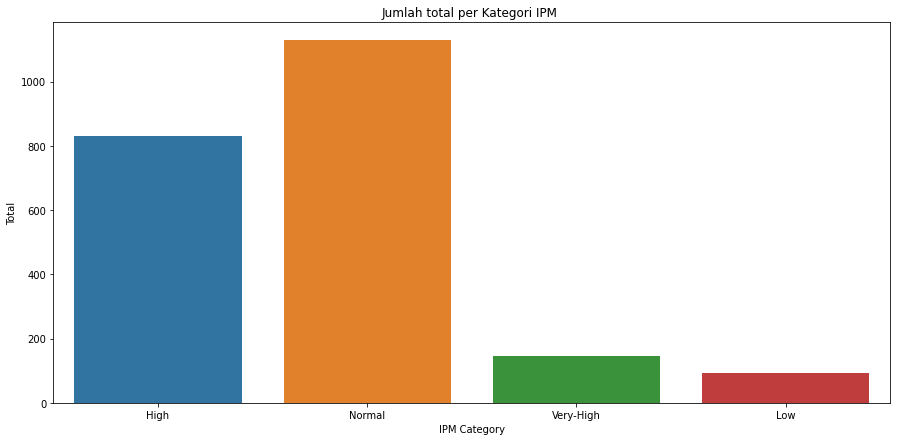

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
sns.countplot(data['IPM'])
plt.xlabel("IPM Category")
plt.ylabel("Total")
plt.title('Jumlah total per Kategori IPM ')
plt.show()

# sns.countplot(data['IPM'])

# Processing

In [41]:
from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
new_ipm = preprocessing.LabelEncoder()
data['IPM'] = new_ipm.fit_transform(data['IPM'])
data['IPM'].unique()

array([0, 2, 3, 1])

In [42]:
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,0
1,13.90,7148,9.48,65.28,2
2,14.32,8776,8.68,67.43,2
3,14.60,8180,8.88,64.40,2
4,14.01,8030,9.67,68.22,2
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,1
2192,7.11,5440,2.51,65.26,1
2193,9.79,4761,2.99,64.83,1
2194,14.99,14922,11.30,70.15,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.9 KB


In [44]:
fitur_x = ['Harapan_Lama_Sekolah','Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah','Usia_Harapan_Hidup']
x = data[fitur_x].values
y = data['IPM'].values



In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 120)

# Normalisasi

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# MODEL

In [47]:
# agar data yang digunakan tidak memiliki penyimpangan yang besar.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=classifier.predict(X_test)
y_pred


array([2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 3, 3, 0, 2, 3, 2, 2, 2, 0, 0,
       2, 2, 0, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 3, 2, 1, 1, 2,
       2, 2, 2, 3, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 3, 0, 0, 3, 2,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 0, 0, 3, 2, 3, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 3, 3, 0, 2, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 3, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2,
       0, 2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 3, 2, 2, 2, 0, 0,
       0, 3, 2, 0, 1, 3, 2, 2, 3, 0, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[161   0   5   3]
 [  0  24   0   0]
 [ 10   0 206   0]
 [  1   0   0  30]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       169
           1       1.00      1.00      1.00        24
           2       0.98      0.95      0.96       216
           3       0.91      0.97      0.94        31

    accuracy                           0.96       440
   macro avg       0.96      0.97      0.96       440
weighted avg       0.96      0.96      0.96       440



In [51]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9568181818181818

## TEST YANG LAIN

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : range(1,30),
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : range(1,50)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [ ]:
g_fix = gs.fit(X_train, y_train)


best = g_fix.best_

pri

# SALAH

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
dummy_ipm = pd.get_dummies(data["IPM"])
dummy_ipm.head()

,High,Low,Normal,Very-High
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
x = data.drop(['IPM'], axis = 1)
x.head()

In [ ]:
y = data['IPM']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 120)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)
y_pred


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy